In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 11s 0us/step


(32, 32, 3)


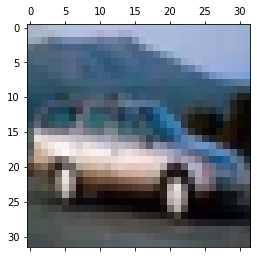

In [ ]:
plt.matshow(x_train[4])
dimensions = x_train[4].shape

# 32x32 with 3 channels
print(dimensions)

In [ ]:
print(x_train[4])

[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ...
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ...
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ...
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ...

 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ...
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ...
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ...
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


In [ ]:
# Normalizing image values 

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# transform labels to categorical values

N_CLASSES = 10
y_train = keras.utils.to_categorical(y_train, N_CLASSES)
print("Y_train shape/type changed to ", y_train.shape, y_train.dtype)

# 10 posibles outputs
y_test = keras.utils.to_categorical(y_test, N_CLASSES)

Y_train shape/type changed to  (50000, 10) float32


In [ ]:
print(x_train[4])

[[[0.66666667 0.70588235 0.77647059]
  [0.65882353 0.69803922 0.76862745]
  [0.69411765 0.7254902  0.79607843]
  ...
  [0.63529412 0.70196078 0.84313725]
  [0.61960784 0.69803922 0.83921569]
  [0.61568627 0.69411765 0.83137255]]

 [[0.65882353 0.70980392 0.77647059]
  [0.6745098  0.7254902  0.78823529]
  [0.67058824 0.71764706 0.78431373]
  ...
  [0.62352941 0.69411765 0.83137255]
  [0.61176471 0.69019608 0.82745098]
  [0.60392157 0.68235294 0.81960784]]

 [[0.60392157 0.66666667 0.72941176]
  [0.58431373 0.64705882 0.70980392]
  [0.50588235 0.56470588 0.63529412]
  ...
  [0.63137255 0.69803922 0.83921569]
  [0.61568627 0.69411765 0.83137255]
  [0.60392157 0.68235294 0.81960784]]

 ...

 [[0.29019608 0.32941176 0.31372549]
  [0.29803922 0.33333333 0.31764706]
  [0.30588235 0.33333333 0.32156863]
  ...
  [0.27843137 0.29411765 0.30588235]
  [0.26666667 0.28235294 0.29411765]
  [0.23921569 0.25490196 0.26666667]]

 [[0.26666667 0.29803922 0.30196078]
  [0.27058824 0.30196078 0.30588235]


La representación gráfica del maxpooling: 
https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png

In [ ]:
def create_model() -> keras.Sequential:
  # Modelo secuencial
  cifar10_model = tf.keras.models.Sequential()

  # Agrego la capa de entrada donde específico el tamaño de los datos de entrada
  cifar10_model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

  # Agrego una capa convolucional con 32 filtros, con kernel size 3, dejando el mismo tamaño inicial (padding=same)
  # Y aplico la activación mediante ReLU
  cifar10_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

  # Capa de maxpool, pool_size -> Tamaño máximo de la ventana
  # Strides, especifica cuanto recorre en cada paso que se realize en el pooling
  cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Dropout layer permite generar conexiones aleatorias entre las capas
  cifar10_model.add(tf.keras.layers.Dropout(0.4))

  #Agrego capa de Conv2D
  cifar10_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

  #Agrego capa de maxpool
  cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(2,2)))

  # Agrego la capa final (capa de 1 dimensión final)
  cifar10_model.add(tf.keras.layers.Flatten())

  # Debe distinguir entre 10 clases (categorías a clasificar) que se eligen mediante softmax
  cifar10_model.add(tf.keras.layers.Dense(10, activation="softmax"))

  return cifar10_model

In [ ]:
model = create_model()

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1568)             

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Epochs: Número de épocas (iteraciones) a realizar para que entrene la red
# batch_size: Con cuantas muestras voy a entrenar en una iteración dentro de una época
# p.e: si batch_size=100 y la muestra=1000 -> Realizaré 10 iteraciones dentro de una época
# para entrenar con el conjunto de datos
# validation_split es una fracción a utilizar para evaluar la red y que no se produzca
# el overfitting (sobreajuste). Con esto consigo que mi modelo no se centre solo en resolver
# su dataset, sino que se pueda aplicar de manera genérica.
history = model.fit(x_train, y_train, epochs=50, batch_size=1000, validation_split=0.2)

Epoch 1/50
40/40 [==============================] - 4s 83ms/step - loss: 2.0778 - accuracy: 0.2419 - val_loss: 1.9257 - val_accuracy: 0.3268
Epoch 2/50
40/40 [==============================] - 3s 74ms/step - loss: 1.7358 - accuracy: 0.3830 - val_loss: 1.7432 - val_accuracy: 0.3804
Epoch 3/50
40/40 [==============================] - 3s 75ms/step - loss: 1.5884 - accuracy: 0.4309 - val_loss: 1.5465 - val_accuracy: 0.4579
Epoch 4/50
40/40 [==============================] - 3s 72ms/step - loss: 1.4855 - accuracy: 0.4733 - val_loss: 1.4523 - val_accuracy: 0.4911
Epoch 5/50
40/40 [==============================] - 3s 75ms/step - loss: 1.4032 - accuracy: 0.5017 - val_loss: 1.3892 - val_accuracy: 0.5194
Epoch 6/50
40/40 [==============================] - 3s 74ms/step - loss: 1.3451 - accuracy: 0.5268 - val_loss: 1.3154 - val_accuracy: 0.5430
Epoch 7/50
40/40 [==============================] - 3s 75ms/step - loss: 1.2960 - accuracy: 0.5455 - val_loss: 1.2654 - val_accuracy: 0.5648
Epoch 8/50
40

My test image[678] is a airplane


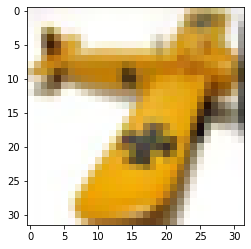

In [ ]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
index = random.choice(range(0, 10000))
result = y_test[index].argmax()

print(f"My test image[{index}] is a {class_names[result]}")
plt.imshow(x_test[index])

In [ ]:
test_image = x_test[index]
print(test_image.shape)
print(x_test.shape)

(32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
test_image = np.expand_dims(test_image, 0)
print(test_image.shape)
print(x_test.shape)

(1, 32, 32, 3)
(10000, 32, 32, 3)


My test image[6082] is a airplane
My model says: airplane


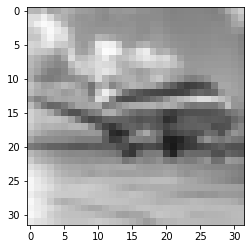

In [ ]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
index = random.choice(range(0, 10000))

# Array with a structure -> i.e: [.0, .0, .0, 0., 1, 0., 0., 0., 0., 0.]
result = y_test[index].argmax()

print(f"My test image[{index}] is a {class_names[result]}")
plt.imshow(x_test[index])

# Result

test_image = x_test[index]
test_image = np.expand_dims(test_image, 0)

predict = model.predict(test_image)
result_class = class_names[predict.argmax()]

print(f"My model says: {result_class}")

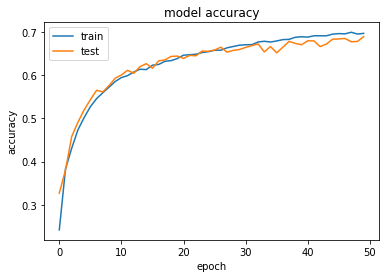

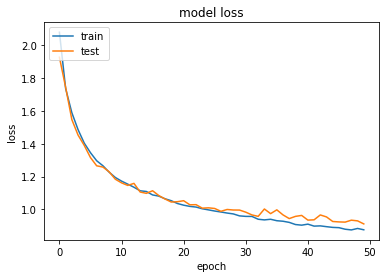

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Saving my model in drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/compiledModels/CIFAR10

my_model


In [ ]:
model.save("/content/gdrive/MyDrive/compiledModels/CIFAR10/my_model.h5")

**Versión reduciendo el overfitting**

In [ ]:
# En este modelo voy a reducir el número de neuronas, y aplicar dropouts layers

def create_model_2() -> keras.Sequential:
  # Modelo secuencial
  cifar10_model = tf.keras.models.Sequential()

  # Agrego la capa de entrada donde específico el tamaño de los datos de entrada
  cifar10_model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

  # Agrego una capa convolucional con 32 filtros, con kernel size 3, dejando el mismo tamaño inicial (padding=same)
  # Y aplico la activación mediante ReLU
  cifar10_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

  # Capa de maxpool, pool_size -> Tamaño máximo de la ventana
  # Strides, especifica cuanto recorre en cada paso que se realize en el pooling
  cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None))

  #Agrego capa de Conv2D
  cifar10_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))

  #Agrego capa de maxpool
  cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=None))

  # Dropout layer permite generar conexiones aleatorias entre las capas
  cifar10_model.add(tf.keras.layers.Dropout(0.5))

  # Agrego la capa final (capa de 1 dimensión final)
  cifar10_model.add(tf.keras.layers.Flatten())

  # Debe distinguir entre 10 clases (categorías a clasificar) que se eligen mediante softmax
  cifar10_model.add(tf.keras.layers.Dense(10, activation="softmax"))

  return cifar10_model

In [ ]:
# Pararé de entrenar el modelo cuando el porcentaje de error en el modelo de validación
# empieze a subir. El modelo por lo general empezará a ir a peor cuanto mas entrena.

# En este caso si está mas de 3 épocas sin mejora alguna el modelo se detendrá

callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [ ]:
model2 = create_model_2()
model1 = create_model()

model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10, batch_size=50, validation_split=0.05)
history2 = model2.fit(x_train, y_train, callbacks=[callback], epochs=10, validation_split=0.4)

Epoch 1/50
950/950 [==============================] - 10s 10ms/step - loss: 1.5623 - accuracy: 0.4406 - val_loss: 1.2772 - val_accuracy: 0.5680
Epoch 2/50
950/950 [==============================] - 9s 9ms/step - loss: 1.2023 - accuracy: 0.5819 - val_loss: 1.1073 - val_accuracy: 0.6288
Epoch 3/50
692/950 [====================>.........] - ETA: 2s - loss: 1.0883 - accuracy: 0.6207

KeyboardInterrupt: ignored

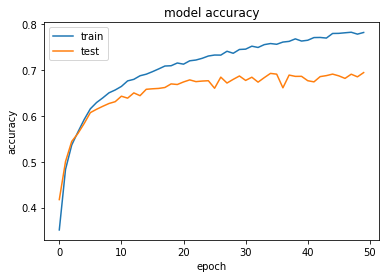

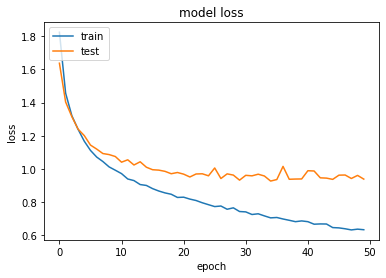

In [ ]:
# Modelo anterior que tenía
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

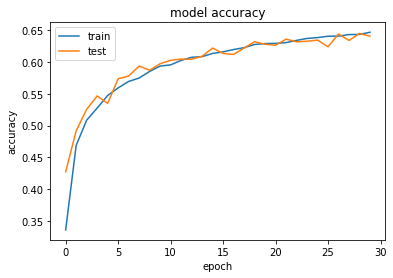

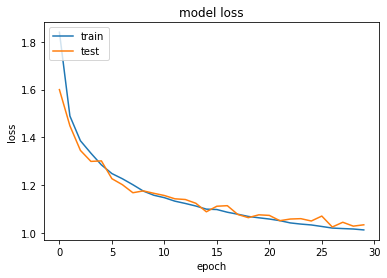

In [ ]:
# Modelo actual intentando reducir el overfitting
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1.evaluate(x_test, y_test)
model2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0220 - accuracy: 0.6441


[1.0220246315002441, 0.64410001039505]

In [ ]:
def create_model_3() -> keras.Sequential:

  num_classes = 10
  img_height = 32
  img_width = 32

  # Aplico pequeñas variaciones a las imágenes para que así entrene de forma mas genérica
  data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
  )

  model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
  ])

  return model


In [ ]:
model = create_model_3()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                 

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(x_train, y_train, epochs=300, callbacks=[callback], batch_size=10,validation_split=0.1)

Epoch 1/300
4500/4500 [==============================] - 38s 8ms/step - loss: 8.0497 - accuracy: 0.1005 - val_loss: 8.2718 - val_accuracy: 0.0936
Epoch 2/300
4500/4500 [==============================] - 38s 8ms/step - loss: 8.0497 - accuracy: 0.1005 - val_loss: 8.2718 - val_accuracy: 0.0936
Epoch 3/300
4500/4500 [==============================] - 37s 8ms/step - loss: 8.0497 - accuracy: 0.1005 - val_loss: 8.2718 - val_accuracy: 0.0936
Epoch 4/300
4500/4500 [==============================] - 37s 8ms/step - loss: 8.0497 - accuracy: 0.1005 - val_loss: 8.2718 - val_accuracy: 0.0936
Epoch 5/300
4500/4500 [==============================] - 37s 8ms/step - loss: 8.0497 - accuracy: 0.1005 - val_loss: 8.2718 - val_accuracy: 0.0936
Epoch 6/300
4500/4500 [==============================] - 37s 8ms/step - loss: 8.0497 - accuracy: 0.1005 - val_loss: 8.2718 - val_accuracy: 0.0936
Epoch 7/300
4500/4500 [==============================] - 37s 8ms/step - loss: 8.0497 - accuracy: 0.1005 - val_loss: 8.2718 -

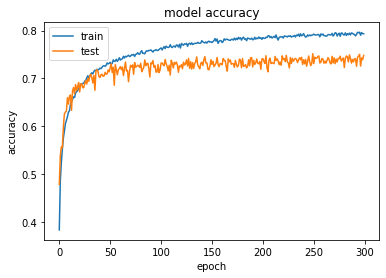

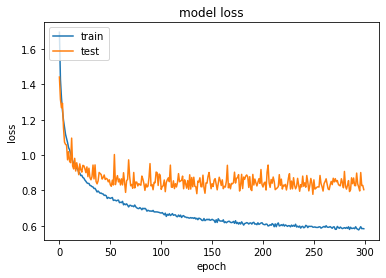

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8227 - accuracy: 0.7468


[0.82273268699646, 0.7468000054359436]